In [1]:
import sys
sys.path.append('../')
sys.path.append('../Nets/')
from glob import glob
from os.path import join, isfile, basename
from multiprocessing import Pool
from tqdm import tqdm
from numpy import *
import pandas as pd
from paths import *
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import cv2

In [2]:
predicts_files = sorted(glob(join(PATH['DATA_OUT'],'DATAFRAMES','predicted.csv')))

In [3]:
data = pd.read_csv(join(PATH['DATA_OUT'], 'DATAFRAMES', 'top_patches'))
data['patientid'] = data.patchid.apply(lambda x: x[:32])
train = data.merge(pd.read_csv(PATH['LABELS']), 
                   left_on='patientid', 
                   right_on='id').drop(['patientid'], axis=1)

In [4]:
patch_file = train['patchid'][3]

In [5]:
patch = load(join(PATH['ENHANCED_CROPPED'],patch_file)).astype(float)
patch = ((patch-patch.min())/(patch.max()-patch.min())*255).astype(uint8)

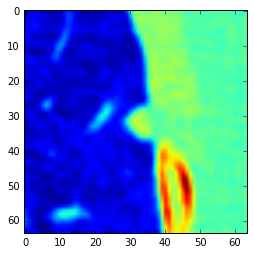

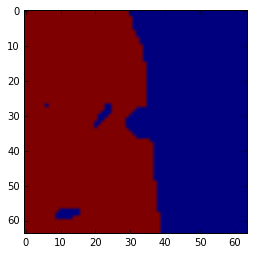

In [6]:
plt.imshow(patch[32])
plt.show()
kmeans = KMeans(n_clusters=2)
fit = kmeans.fit_predict(patch.flatten().reshape(-1,1))
mask = fit.reshape((64,64,64))
plt.imshow(mask[32])

In [7]:
circles = cv2.HoughCircles(patch[32],cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

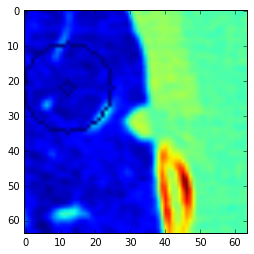

In [8]:
img_show = patch[32].copy()
circles = uint16(around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_show,(i[0],i[1]),i[2],color=(0,255,0))
    # draw the center of the circle
    cv2.circle(img_show,(i[0],i[1]),2,color=(0,0,255))

plt.imshow(img_show)

In [44]:
patch = load(join(PATH['ENHANCED_CROPPED'],f['patchid'][6]))

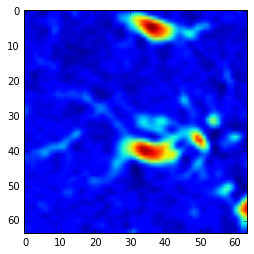

In [46]:
plt.imshow(patch[30])

In [1]:
path = '/home/a.dobrenkii/Projects/Kaggle/DataScienceBowl2K17/data/KAGGLE_CANDIDATES/'